In [ ]:
from google.colab import files
import pandas as pd

# Upload file
uploaded = files.upload()

Saving dataset.csv to dataset (1).csv


In [ ]:
#Making a dataframe of the given csv file

df=pd.read_csv("dataset.csv")
df.head()

,customer_id,age,region,tenure_months,current_plan,monthly_data_gb,call_minutes,overage_charges,previous_upgrades,target_upgrade
0,CUST_000001,45,Suburban,110,Basic_2GB,1.40,525,0.00,1,0
1,CUST_000002,38,Rural,31,Standard_5GB,5.04,525,0.00,0,0
2,CUST_000003,47,Urban,24,Standard_5GB,2.60,525,0.00,0,1
3,CUST_000004,58,Rural,50,Basic_2GB,0.50,525,0.00,0,0
4,CUST_000005,37,Suburban,11,Standard_5GB,5.13,525,2.81,1,0


In [ ]:
#Shape of the dataset

df.shape

(25000, 10)

In [ ]:
df.columns

Index(['customer_id', 'age', 'region', 'tenure_months', 'current_plan',
       'monthly_data_gb', 'call_minutes', 'overage_charges',
       'previous_upgrades', 'target_upgrade'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        25000 non-null  object 
 1   age                25000 non-null  int64  
 2   region             25000 non-null  object 
 3   tenure_months      25000 non-null  int64  
 4   current_plan       25000 non-null  object 
 5   monthly_data_gb    25000 non-null  float64
 6   call_minutes       25000 non-null  int64  
 7   overage_charges    25000 non-null  float64
 8   previous_upgrades  25000 non-null  int64  
 9   target_upgrade     25000 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 1.9+ MB


In [ ]:
df.describe()

,age,tenure_months,monthly_data_gb,call_minutes,overage_charges,previous_upgrades,target_upgrade
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,39.671000,41.206360,4.629176,411.700800,11.523842,0.574760,0.452560
std,11.533718,30.191637,4.194288,158.848455,21.188634,0.796565,0.497754
min,18.000000,1.000000,0.100000,189.000000,0.000000,0.000000,0.000000
25%,31.000000,17.000000,1.610000,189.000000,0.000000,0.000000,0.000000
50%,40.000000,36.000000,3.280000,525.000000,1.720000,0.000000,0.000000
75%,48.000000,56.000000,6.390000,525.000000,13.370000,1.000000,1.000000
max,70.000000,120.000000,34.070000,525.000000,200.000000,5.000000,1.000000


In [ ]:
#Checking if there are any null values

df.isnull().sum()

#No null values found

,0
customer_id,0
age,0
region,0
tenure_months,0
current_plan,0
monthly_data_gb,0
call_minutes,0
overage_charges,0
previous_upgrades,0
target_upgrade,0


In [ ]:
numerical_cols= ["age","tenure_months","monthly_data_gb","call_minutes","overage_charges","previous_upgrades","target_upgrade"]

df[numerical_cols].corr()

,age,tenure_months,monthly_data_gb,call_minutes,overage_charges,previous_upgrades,target_upgrade
age,1.000000,-0.003740,-0.369379,0.780116,-0.366116,-0.129103,-0.273782
tenure_months,-0.003740,1.000000,-0.003609,0.000792,-0.002309,0.289930,0.022171
monthly_data_gb,-0.369379,-0.003609,1.000000,-0.299939,0.802846,0.038014,0.306668
call_minutes,0.780116,0.000792,-0.299939,1.000000,-0.305692,-0.101417,-0.232870
overage_charges,-0.366116,-0.002309,0.802846,-0.305692,1.000000,0.037370,0.332625
previous_upgrades,-0.129103,0.289930,0.038014,-0.101417,0.037370,1.000000,0.122495
target_upgrade,-0.273782,0.022171,0.306668,-0.232870,0.332625,0.122495,1.000000


 1- Strong positive correlation between age and calling time

 2- Moderate positive correlation between tenure_months and previous_upgrades.

 3- Lower age people are subscribing are having higher monthly data usage while higher age people got higher calling time( Probability)

 4- More monthly data---> more overage charges

 5- More monthly data----> higher chance of
 churn

 6- The next upgrade is independent of the number of previous upgrades and tenure_months

**Univariate Analysis**





In [ ]:
df.columns

Index(['customer_id', 'age', 'region', 'tenure_months', 'current_plan',
       'monthly_data_gb', 'call_minutes', 'overage_charges',
       'previous_upgrades', 'target_upgrade'],
      dtype='object')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipython-input-2997320833.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["age"],kde=True)


<Axes: xlabel='age', ylabel='Density'>

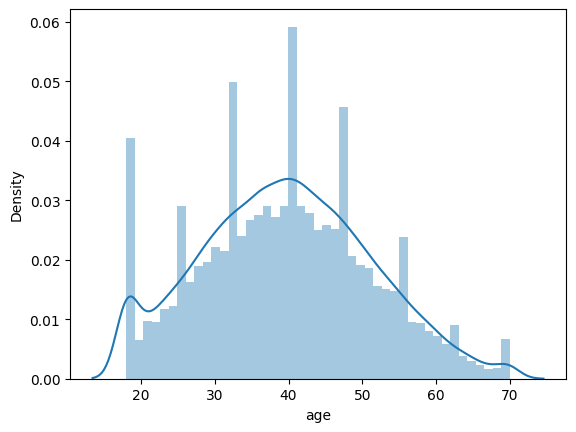

In [ ]:
sns.distplot(df["age"],kde=True)

In [ ]:
#Checking the skewness of the curve
df["age"].skew()

np.float64(0.1446270496119076)

In [ ]:
df["age"].mean()-df["age"].median()

#difference is low so data doesnt have outliers impact and is symmetric as well

np.float64(-0.3290000000000006)

1- Age Range-[18,70]

2- The curve is more or less normally distributed for age with a little spike for 18 years.

In [ ]:
df["region"].value_counts()

,count
region,
Urban,10032
Suburban,8737
Rural,6231


<Axes: xlabel='region', ylabel='count'>

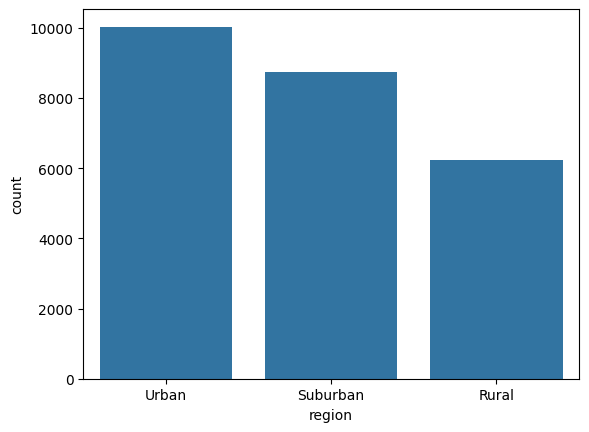

In [ ]:
sns.barplot(df["region"].value_counts())

People in urban>>People in suburban>>People in rural

/tmp/ipython-input-1290057911.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["tenure_months"])


<Axes: xlabel='tenure_months', ylabel='Density'>

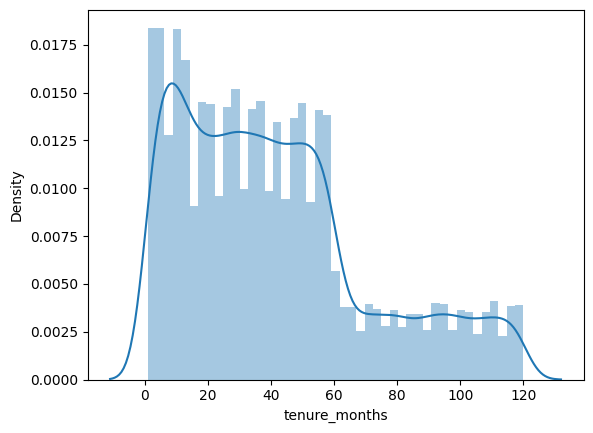

In [ ]:
sns.distplot(df["tenure_months"])

In [ ]:
#Major portion lies between a tenure month of 0 to 5 years.

In [ ]:
(df["tenure_months"]>60).sum()

np.int64(4991)

1-Out of 25000 customers, one fifth of the customers are with the company for more than 5 years.

2-Maybe the company was started 12 years ago/data is 12 years old

In [ ]:
df.head()

,customer_id,age,region,tenure_months,current_plan,monthly_data_gb,call_minutes,overage_charges,previous_upgrades,target_upgrade
0,CUST_000001,45,Suburban,110,Basic_2GB,1.40,525,0.00,1,0
1,CUST_000002,38,Rural,31,Standard_5GB,5.04,525,0.00,0,0
2,CUST_000003,47,Urban,24,Standard_5GB,2.60,525,0.00,0,1
3,CUST_000004,58,Rural,50,Basic_2GB,0.50,525,0.00,0,0
4,CUST_000005,37,Suburban,11,Standard_5GB,5.13,525,2.81,1,0


In [ ]:
df['current_plan'].value_counts()

,count
current_plan,
Basic_2GB,10617
Standard_5GB,10389
Premium_10GB,3994


In [ ]:
#Converting current_plan to a numeric column
df["current_plan_gb"]=df["current_plan"].str.split("_").str[1].replace("GB","",regex=True).astype(int)

In [ ]:
df=df.drop("current_plan",axis=1)
df.head()

,customer_id,age,region,tenure_months,monthly_data_gb,call_minutes,overage_charges,previous_upgrades,target_upgrade,current_plan_gb
0,CUST_000001,45,Suburban,110,1.40,525,0.00,1,0,2
1,CUST_000002,38,Rural,31,5.04,525,0.00,0,0,5
2,CUST_000003,47,Urban,24,2.60,525,0.00,0,1,5
3,CUST_000004,58,Rural,50,0.50,525,0.00,0,0,2
4,CUST_000005,37,Suburban,11,5.13,525,2.81,1,0,5


In [ ]:
df["monthly_data_gb"].mean()

np.float64(4.629176)

/tmp/ipython-input-3231341052.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["monthly_data_gb"])


<Axes: xlabel='monthly_data_gb', ylabel='Density'>

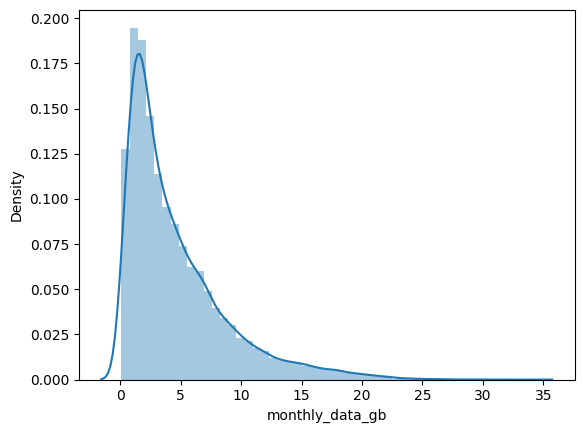

In [ ]:
sns.distplot(df["monthly_data_gb"])

In [ ]:
df["monthly_data_gb"].skew()

np.float64(1.6680377461632983)

In [ ]:
df["call_minutes"].value_counts()

,count
call_minutes,
525,16570
189,8430


([<matplotlib.patches.Wedge at 0x7a8f13892720>,
 [Text(-0.5383877839701315, 0.9592385490959645, '525 min'),
  Text(0.5383880965296955, -0.9592383736669063, '189 min')])

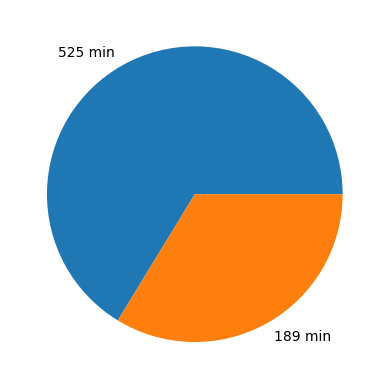

In [ ]:
plt.pie(df["call_minutes"].value_counts(),labels=["525 min","189 min"])

Quite strange that only two categories of call time is there, maybe two strict data plans

<Axes: xlabel='previous_upgrades', ylabel='count'>

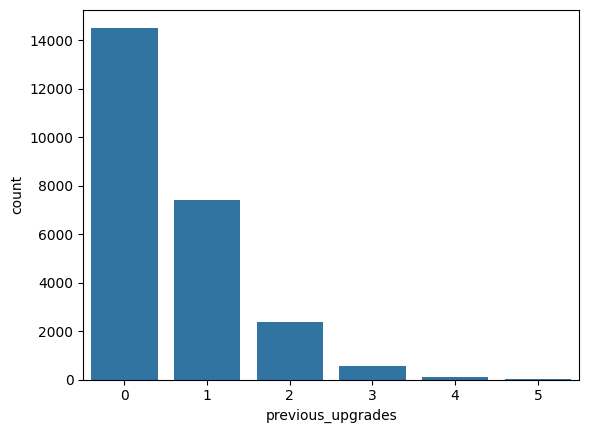

In [ ]:
sns.barplot(df["previous_upgrades"].value_counts())

In [ ]:
df.groupby("previous_upgrades")["target_upgrade"].value_counts()

previous_upgrades  target_upgrade
0                  0                 8621
                   1                 5900
1                  0                 3780
                   1                 3633
2                  1                 1352
                   0                 1029
3                  1                  355
                   0                  214
4                  1                   55
                   0                   38
5                  1                   19
                   0                    4
Name: count, dtype: int64

In [ ]:
df["current_plan_gb"].value_counts()

,count
current_plan_gb,
2,10617
5,10389
10,3994


0 previous upgrades indicates a lot of customers are sticking to the plan which they first opted.



<Axes: xlabel='current_plan_gb', ylabel='count'>

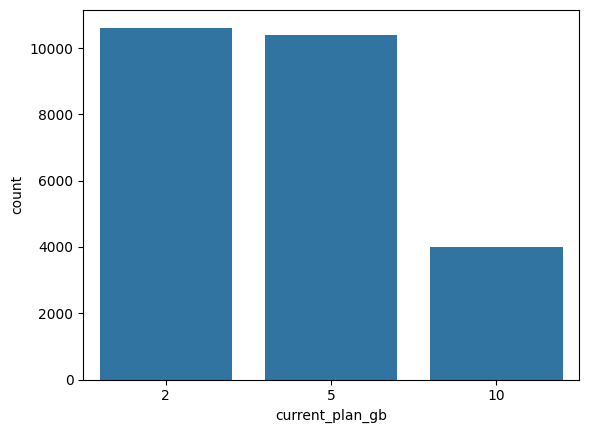

In [ ]:
sns.barplot(df["current_plan_gb"].value_counts())

In [ ]:
df.head()

,customer_id,age,region,tenure_months,monthly_data_gb,call_minutes,overage_charges,previous_upgrades,target_upgrade,current_plan_gb
0,CUST_000001,45,Suburban,110,1.40,525,0.00,1,0,2
1,CUST_000002,38,Rural,31,5.04,525,0.00,0,0,5
2,CUST_000003,47,Urban,24,2.60,525,0.00,0,1,5
3,CUST_000004,58,Rural,50,0.50,525,0.00,0,0,2
4,CUST_000005,37,Suburban,11,5.13,525,2.81,1,0,5


#Outlier Detection

In [ ]:
df.columns

Index(['customer_id', 'age', 'region', 'tenure_months', 'monthly_data_gb',
       'call_minutes', 'overage_charges', 'previous_upgrades',
       'target_upgrade', 'current_plan_gb'],
      dtype='object')

In [ ]:
df['monthly_data_gb']
df['overage_charges']
df.iloc[24996,:]

,24996
customer_id,CUST_024997
age,36
region,Suburban
tenure_months,56
monthly_data_gb,14.71
call_minutes,525
overage_charges,47.02
previous_upgrades,0
target_upgrade,1
current_plan_gb,10


In [ ]:
import numpy as np

conditions = [
    df["monthly_data_gb"] > 10,
    (df["monthly_data_gb"] > 5) & (df["monthly_data_gb"] <= 10),
    (df["monthly_data_gb"] > 2) & (df["monthly_data_gb"] <= 5)
]

choices = [
    df["overage_charges"] / (df["monthly_data_gb"] - 10),
    df["overage_charges"] / (df["monthly_data_gb"] - 5),
    df["overage_charges"] / (df["monthly_data_gb"] - 2)
]

df["overcharge_per_gb"] = np.select(conditions, choices, default=0.0)


In [ ]:
(df["overcharge_per_gb"]<0).sum()

np.int64(0)

There are no users who are charged unnecesarily

In [ ]:
df["overcharge_per_gb"].value_counts()

,count
overcharge_per_gb,
0.000000,11714
1.000000,5
11.000000,4
15.000000,4
17.000000,4
...,...
11.824000,1
0.176471,1
8.263889,1


In [ ]:
df.head()

,customer_id,age,region,tenure_months,monthly_data_gb,call_minutes,overage_charges,previous_upgrades,target_upgrade,current_plan_gb,overcharge_per_gb
0,CUST_000001,45,Suburban,110,1.40,525,0.00,1,0,2,0.000000
1,CUST_000002,38,Rural,31,5.04,525,0.00,0,0,5,0.000000
2,CUST_000003,47,Urban,24,2.60,525,0.00,0,1,5,0.000000
3,CUST_000004,58,Rural,50,0.50,525,0.00,0,0,2,0.000000
4,CUST_000005,37,Suburban,11,5.13,525,2.81,1,0,5,21.615385


<Axes: xlabel='age', ylabel='monthly_data_gb'>

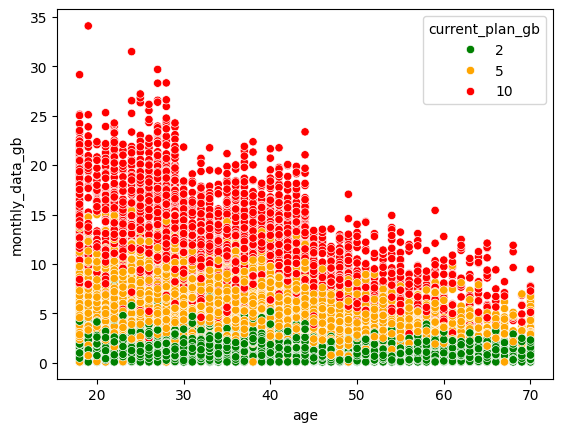

In [ ]:
#How does age relate to monthly data usage, call minutes, and overage charges?

sns.scatterplot(x="age",y="monthly_data_gb",data=df,hue="current_plan_gb",palette={10: "red",5: "orange",2: "green"})

#The graph is kind of decreasing in height which means with age, data usage generally decreases
#For 2GB- the data usage is independent of age'
#For 5GB- a lot of users are using more than 5gb, thus overcharge
#For 10GB- the condition worsens, majority of the people are paying overcharge

In [ ]:
(df[df["current_plan_gb"]==10]["overage_charges"]!=0).sum()

#3095 users pay overcharges

np.int64(3095)

In [ ]:
# Filter for users on the 10GB plan with overage charges
overcharging_10gb_users = df[(df["current_plan_gb"] == 10) & (df["overage_charges"] != 0)]

# Filter those users who are above 40 years old
users_above_40_with_overcharge = overcharging_10gb_users[overcharging_10gb_users["age"] > 40]

# Count the number of such users
num_users_above_40_with_overcharge = users_above_40_with_overcharge.shape[0]

print(f"Out of the 3095 users with overage charges on the 10GB plan, {num_users_above_40_with_overcharge} are above 40 years old.")

Out of the 3095 users with overage charges on the 10GB plan, 927 are above 40 years old.


In [ ]:
#70 percent users who opt for 10gb and pay overcharge are below 40 years of age

In [ ]:
df.head()

,customer_id,age,region,tenure_months,monthly_data_gb,call_minutes,overage_charges,previous_upgrades,target_upgrade,current_plan_gb,overcharge_per_gb
0,CUST_000001,45,Suburban,110,1.40,525,0.00,1,0,2,0.000000
1,CUST_000002,38,Rural,31,5.04,525,0.00,0,0,5,0.000000
2,CUST_000003,47,Urban,24,2.60,525,0.00,0,1,5,0.000000
3,CUST_000004,58,Rural,50,0.50,525,0.00,0,0,2,0.000000
4,CUST_000005,37,Suburban,11,5.13,525,2.81,1,0,5,21.615385


<Axes: xlabel='region', ylabel='count'>

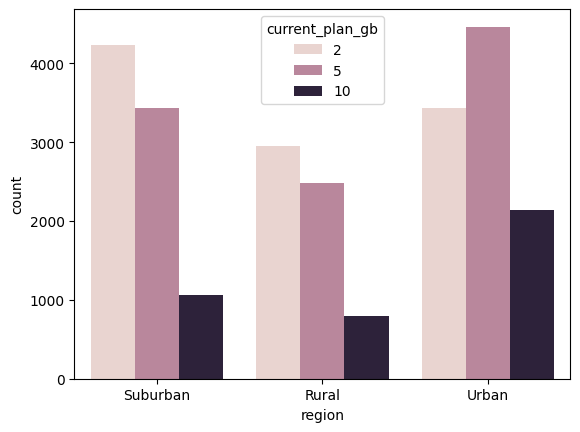

In [ ]:
#Dependence of choice of data pack on region
sns.countplot(x="region",hue="current_plan_gb",data=df)

#Urban people choose 5gb datapacks more, the trend in rural and suburban is more or less the same.

In [ ]:
df.groupby("region")["target_upgrade"].mean()

#This shows the probability of upgradation in regions
# Urban has a high probaility inspite of the largest number of users amongst all the three
#Rural and Suburban have lesser, which may be because of low data speed.

,target_upgrade
region,
Rural,0.267854
Suburban,0.425089
Urban,0.591208


In [ ]:
df.groupby(["region","current_plan_gb"])["target_upgrade"].mean()

#Urban customers on larger data plans are the most likely to upgrade.
#Rural customers are generally less likely to upgrade, regardless of their current plan.
#Targeting urban and suburban customers on 5GB and 10GB plans might be the most effective strategy for promoting upgrades.

region    current_plan_gb
Rural     2                  0.253139
          5                  0.288067
          10                 0.259119
Suburban  2                  0.388863
          5                  0.458515
          10                 0.461466
Urban     2                  0.518065
          5                  0.611198
          10                 0.666979
Name: target_upgrade, dtype: float64

In [ ]:
df.head()

,customer_id,age,region,tenure_months,monthly_data_gb,call_minutes,overage_charges,previous_upgrades,target_upgrade,current_plan_gb,overcharge_per_gb
0,CUST_000001,45,Suburban,110,1.40,525,0.00,1,0,2,0.000000
1,CUST_000002,38,Rural,31,5.04,525,0.00,0,0,5,0.000000
2,CUST_000003,47,Urban,24,2.60,525,0.00,0,1,5,0.000000
3,CUST_000004,58,Rural,50,0.50,525,0.00,0,0,2,0.000000
4,CUST_000005,37,Suburban,11,5.13,525,2.81,1,0,5,21.615385


<Axes: xlabel='monthly_data_gb', ylabel='monthly_data_gb'>

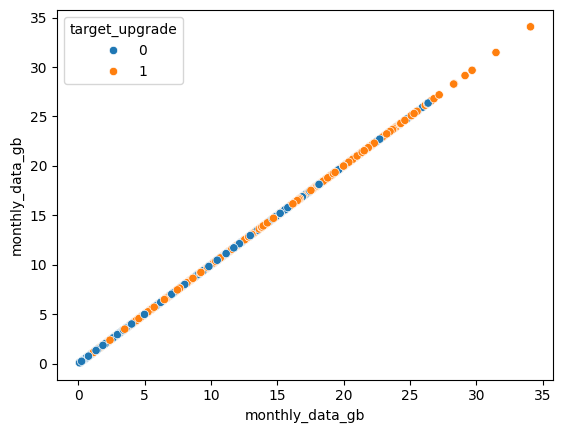

In [ ]:
sns.scatterplot(x=df["monthly_data_gb"],y=df["monthly_data_gb"],hue=df["target_upgrade"])

#customers who use more data are likely to upgrade their plan.

In [ ]:
df["tenure_months"]

,tenure_months
0,110
1,31
2,24
3,50
4,11
...,...
24995,77
24996,56
24997,48
24998,108


<Axes: xlabel='tenure_months', ylabel='tenure_months'>

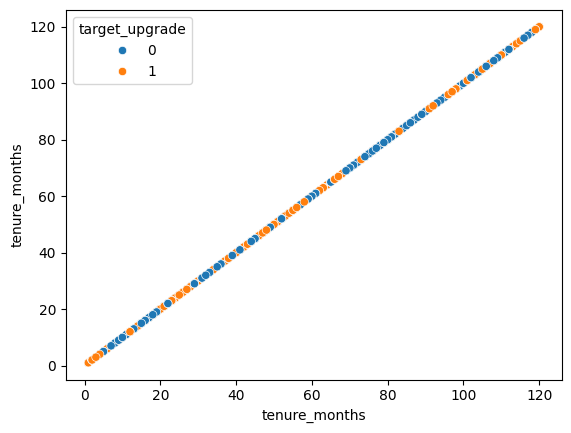

In [ ]:
sns.scatterplot(x=df["tenure_months"],y=df["tenure_months"],hue=df["target_upgrade"])

#Target is independent of tenure
#The company should reduce their budget on long loyal customers and increase their budget on high data pack, moderate pack customers especially in suburban and urban areas.

<Axes: xlabel='overage_charges', ylabel='overage_charges'>

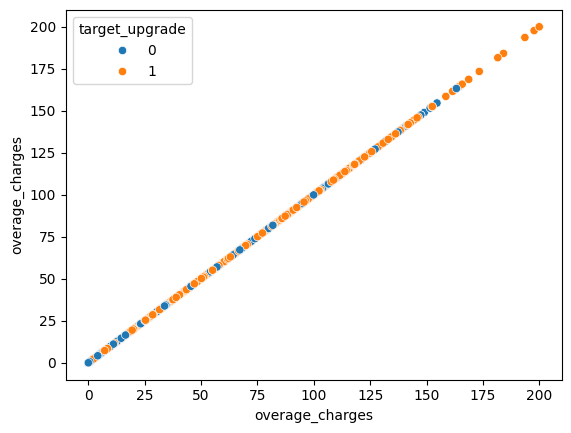

In [ ]:
sns.scatterplot(x=df["overage_charges"],y=df["overage_charges"],hue=df["target_upgrade"])

#Overage charges ones are quite loyal in churning

<Axes: xlabel='previous_upgrades', ylabel='previous_upgrades'>

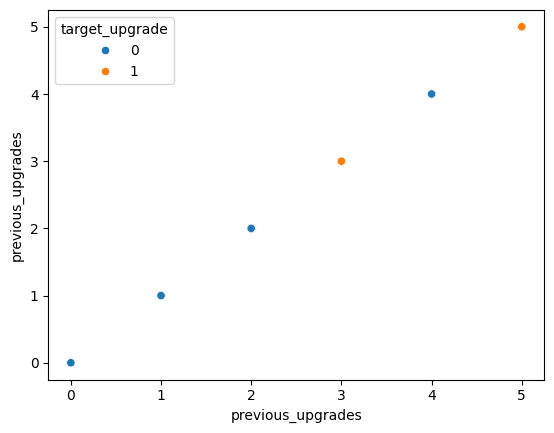

In [ ]:
sns.scatterplot(x=df["previous_upgrades"],y=df["previous_upgrades"],hue=df["target_upgrade"])

In [ ]:
df.groupby("previous_upgrades")["target_upgrade"].mean()

#The people with more previous upgrades are expected to upgrade again.(Important)

,target_upgrade
previous_upgrades,
0,0.406308
1,0.490085
2,0.567829
3,0.623902
4,0.591398
5,0.826087


In [ ]:
df.head()

,customer_id,age,region,tenure_months,monthly_data_gb,call_minutes,overage_charges,previous_upgrades,target_upgrade,current_plan_gb,overcharge_per_gb
0,CUST_000001,45,Suburban,110,1.40,525,0.00,1,0,2,0.000000
1,CUST_000002,38,Rural,31,5.04,525,0.00,0,0,5,0.000000
2,CUST_000003,47,Urban,24,2.60,525,0.00,0,1,5,0.000000
3,CUST_000004,58,Rural,50,0.50,525,0.00,0,0,2,0.000000
4,CUST_000005,37,Suburban,11,5.13,525,2.81,1,0,5,21.615385


In [ ]:
df.to_csv('transformed_dataset.csv', index=False)

In [ ]:
from google.colab import files
files.download('transformed_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/tmp/ipython-input-1650158305.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["overage_charges"])


np.float64(2.7923704316850673)

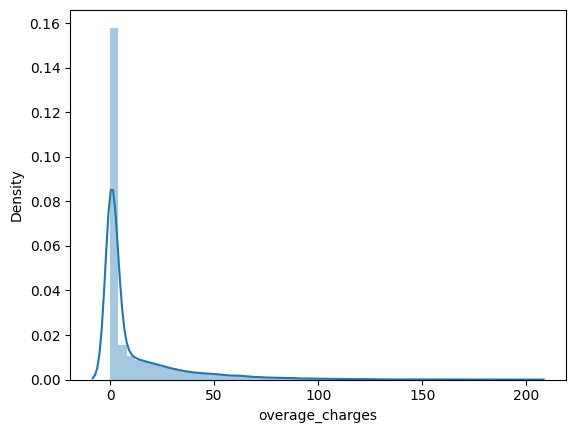

In [ ]:
sns.distplot(df["overage_charges"])
df["overage_charges"].skew()